# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, **Grade 8 Math**
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import numpy
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
def select_state(csv_file, state: str): # Helper function to load a state. Although it is a one-liner, I found it helpful.
    return csv_file[csv_file["STATE"] == state]

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
states_csv = pd.read_csv("../data/states_edu.csv")
states_csv.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

In [3]:
# Complete
# Primary key = unique row identifier; YEAR_STATE format
# State = state in which data was taken
# Year = year in which data was taken
# Enroll = # of students enrolled in the given region in that year
# GRADES_blank_G = Enrollment numbers across grades
# Revenue is the amount of money taken in depending on level
# Expenditures are money spent subdivided into types in a given state and year
# Scores are test results, with most being averages in the given time/place

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [4]:
# I think the tutorial does the column renaming best, so I'm using that here
states_csv.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: GRADE 8 MATH

How many years of data are logged in our dataset? 

In [5]:
print(states_csv["YEAR"].nunique()) # total years as per request
print(min(states_csv["YEAR"]), "-", max(states_csv["YEAR"])) # print year range

33
1986 - 2019


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [6]:
rows_michigan = select_state(states_csv, "MICHIGAN") # select rows with state michigan for comparison
rows_ohio = select_state(states_csv, "OHIO") # Same as previous, for ohio
out_bool = rows_michigan["AVG_MATH_8_SCORE"].mean() > rows_ohio["AVG_MATH_8_SCORE"].mean() # Do comparison for quest
print(out_bool) # Print
# Ohio has a higher average across all years for Grade 8 math

False


Find the average for your chosen test across all states in 2019

In [7]:
rows_2019 = states_csv[states_csv["YEAR"] == 2019]["AVG_MATH_8_SCORE"] # Query year 2019, then get math 8 score
print(rows_2019.mean())

281.2641509433962


For each state, find a maximum value for your chosen test score

In [8]:
# for i, state in enumerate(states_csv["STATE"].unique()):
#     row_state = select_state(states_csv, state)
#     state_curmax_ind = numpy.argmax(row_state["AVG_MATH_8_SCORE"])
#     state_curmax = row_state["AVG_MATH_8_SCORE"].iloc[state_curmax_ind]
#     state_max_year = row_state["YEAR"].iloc[state_curmax_ind]
#     print(state, state_curmax, state_max_year)
# I realized this was all redudant after I re-read the tutorial and instructions. 
# It is now memorialized so I know what now to do in future. 

states_csv.groupby('STATE')["AVG_MATH_8_SCORE"].max() # Use groupby to seperate out into states, get avg_math_8_score, use max aggregator

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

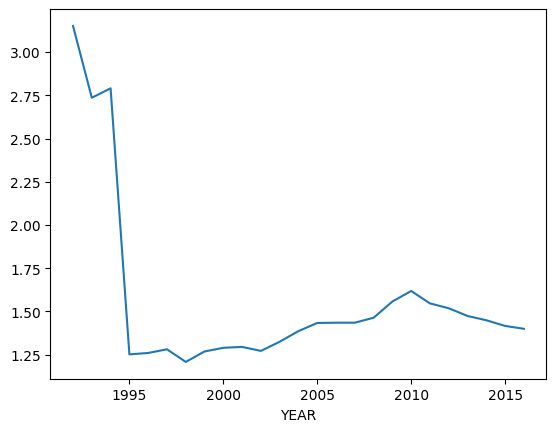

In [22]:
states_csv["KNOWN_DIRECT_EXPENDITURE_PER_STUDENT"] = (states_csv["INSTRUCTION_EXPENDITURE"] + states_csv["SUPPORT_SERVICES_EXPENDITURE"]) / states_csv["ENROLL_ALL"]
# ^ This seems like the most obvious feature, and I would expect a positive correlation as more expenditure per student means more resources for said student,
# thus this would likely lead to better test scores from said student
# I think it would also be interesting to see if there's a correlation between school size and the amount they spend
# Though I do wish we had expenditure broken down further into grade-by-grade data

states_csv["REVENUE_PER_STUDENT"] = states_csv["STATE_REVENUE"]/states_csv["ENROLL_ALL"]
states_csv["PERCENT_SPENT_ON_DIRECT_STUDENT"] = states_csv["KNOWN_DIRECT_EXPENDITURE_PER_STUDENT"]/states_csv["REVENUE_PER_STUDENT"]
# Enroll all's cancel

states_csv["SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT"] = states_csv["SUPPORT_SERVICES_EXPENDITURE"] / states_csv["ENROLL_ALL"]
# ^ This would likely show the same pattern as the total expenditure per student, but I'm curious to see any differences
states_csv["EXPENDITURE_TYPES_RATIO"] = states_csv["INSTRUCTION_EXPENDITURE"] / states_csv["SUPPORT_SERVICES_EXPENDITURE"] 
# ^ This may not be the most useful; I would suspect this shows no real correlation or pattern, but this would be interesting to see

# V This part is for Michigan only, but I think it would be cool to see if education maintained % revenue over time
def plot_education_revenue_expenditure_percent_vs_time(state: str):
    state_data = select_state(states_csv, state)
    state_data.groupby('YEAR')["PERCENT_SPENT_ON_DIRECT_STUDENT"].mean().plot()
    plt.show()

plot_education_revenue_expenditure_percent_vs_time("MICHIGAN")


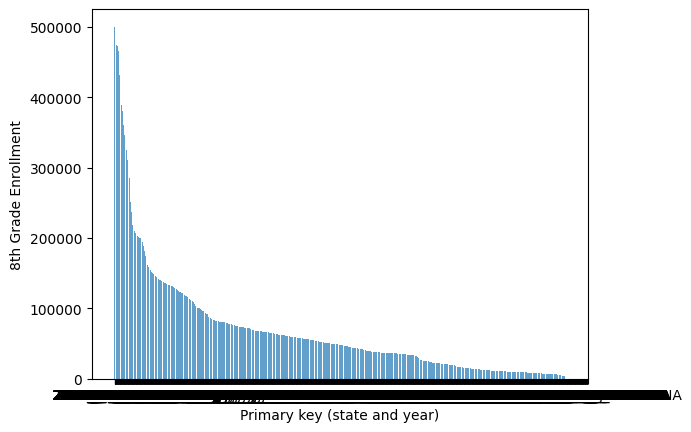

C:\Users\Zayd Uzzaman\AppData\Local\Temp\ipykernel_14568\277126056.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  states_csv.groupby('8TH_GRADE_CLASS_SIZE_BINS')["AVG_MATH_8_SCORE"].mean().plot()


Text(0.5, 1.0, '8th Grade Math Score Over Class Size')

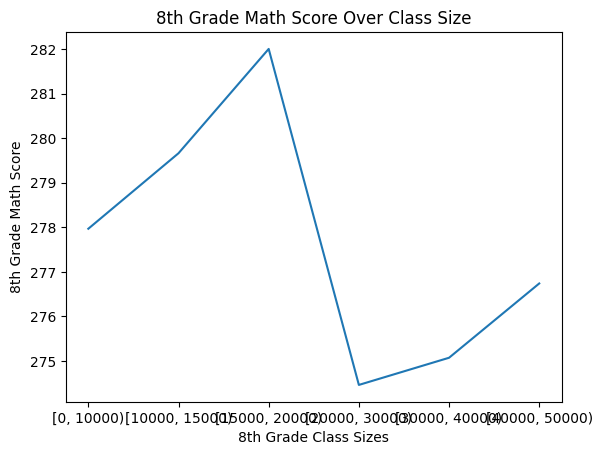

In [10]:
# This is a little much so it's in its own cell

states_csv_by_enroll_8 = states_csv.sort_values(by = "ENROLL_8", ascending=False)
plt.bar(states_csv_by_enroll_8["PRIMARY_KEY"], states_csv_by_enroll_8["ENROLL_8"], alpha=0.7)
plt.xlabel("Primary key (state and year)")
plt.ylabel("8th Grade Enrollment")
plt.show() # In order to see the enrollment sizes

# There are a couple sharp drop offs here. I think ~every 10k enrolled seems appropriate, but it may be useful to have another bin between 15k and 20k, and 10k and 15k
bins = [0, 10000, 15000, 20000, 30000, 40000, 50000]
labels = ["SMALLEST", "SMALL", "LOW_MEDIUM", "HIGH_MEDIUM", "BIG", "BIGGEST"]

states_csv["8TH_GRADE_CLASS_SIZE_BINS"] = pd.cut(states_csv["ENROLL_8"], bins=bins, right=False) # I think it's useful to see if there's a trend among
# expenditure and performance, and then compare that to class sizes
states_csv.groupby('8TH_GRADE_CLASS_SIZE_BINS')["AVG_MATH_8_SCORE"].mean().plot()
plt.xlabel("8th Grade Class Sizes")
plt.ylabel('8th Grade Math Score')
plt.title('8th Grade Math Score Over Class Size') # No real pattern to be seen; autoscaling makes this more dramatic than it actually is

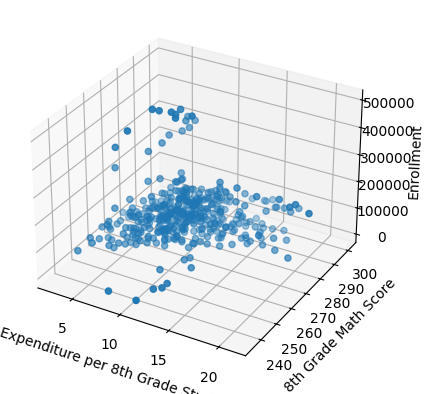

In [11]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(states_csv["KNOWN_DIRECT_EXPENDITURE_PER_STUDENT"], states_csv["AVG_MATH_8_SCORE"], states_csv["ENROLL_8"], )
ax.set_xlabel('Expenditure per 8th Grade Student')
ax.set_ylabel('8th Grade Math Score')
ax.set_zlabel('Enrollment')
plt.show() # Hmm... this is really not as helpful without the toolbar to be able to see better in 3D

Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

-- Added support_services_expenditure_per_student: This is to see the returns of support services, and to infer the helpfulness of such expenditure. I would plot this against the target data to see if there's a positive correlation.

-- Added ratio of instruction to support services expenditure to find a (hopefully) optimal ratio that keeps financial balance

Ideas:
-- Year over year increase in local expenditure
-- 

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

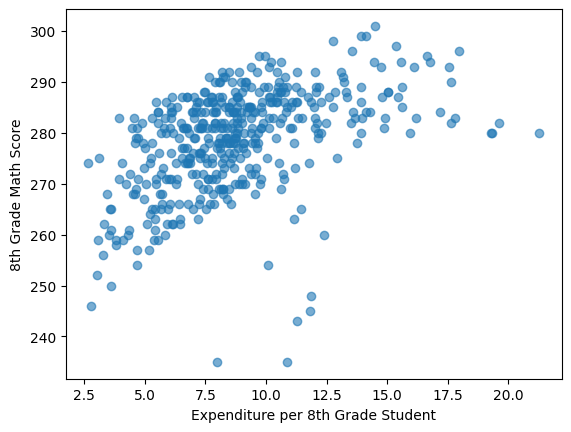

In [12]:
plt.scatter(states_csv["KNOWN_DIRECT_EXPENDITURE_PER_STUDENT"], states_csv["AVG_MATH_8_SCORE"], alpha = 0.6)
plt.xlabel('Expenditure per 8th Grade Student')
plt.ylabel('8th Grade Math Score')

plt.show()



Total expenditure per student vs average 8th grade math score

 This appears to show a positive correlation between 8th grade math score and the total expenditure per student expenditure,
 which is a fairly obvious result. Notably, the data seems to taper off towards the end. 
 In spite of the obvious, there exist datapoints which do not follow this trend which tend to have high expenditure, but low math scores.
 This may indicate other related issues in these states, which should be more closely observed.

**Visualization 2**

**<CAPTION FOR VIZ 2>**

 Support expenditure per student seems to be positive in cases of low expenditure (under 1.25), however more data is likely required as the sample size for this is only six data points
 Otherwise, there is no real pattern; this metric does not appear to be a useful predictor of the response variable.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [13]:
from sklearn.model_selection import train_test_split


In [14]:
# X =
# y = 
X = states_csv[["ENROLL_8", "AVG_MATH_8_SCORE", "KNOWN_DIRECT_EXPENDITURE_PER_STUDENT", "EXPENDITURE_TYPES_RATIO"]].dropna()
y = states_csv.loc[X.index]['AVG_MATH_8_SCORE']
y.fillna(y.median(), inplace=True)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=0) # Using 0.3 for 70/30 split as per tutorial

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [16]:
# import your sklearn class here
# from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [17]:
# create your model here
# model = RandomForestRegressor()
model = LinearRegression()

In [18]:
model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [20]:
print(model.score(X_test, y_test),
      np.mean(model.predict(X_test)-y_test),
      np.mean(np.abs(model.predict(X_test)-y_test)),
      np.mean((model.predict(X_test)-y_test)**2)**0.5)


NameError: name 'np' is not defined

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

In [ ]:
col_name = "KNOWN_DIRECT_EXPENDITURE_PER_STUDENT"

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Math 8 Score')
plt.title("Model Behavior On Training Set")

# col_name = 'AVG_MATH_8_SCORE'

# f = plt.figure(figsize=(12,6))
# plt.scatter(X_test[col_name], y_test, color = "blue")
# plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

# plt.legend(['True testing','Predicted testing'])
# plt.xlabel(col_name)
# plt.ylabel('Reading 8 score')
# plt.title("Model Behavior on Testing Set")

In [ ]:
col_name = "EXPENDITURE_TYPES_RATIO"

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior on Testing Set")